In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data characterization
1. An important step in data analysis is the preprocessing step. Therefore, before considering to use any
Machine Learning model, you are advised to do at least the following:

In [6]:
# Loading the data
domain_3 = pd.read_pickle("data/supercompressible_3d_domain.pkl")
input_3 = pd.read_csv("data/supercompressible_3d_input.csv", index_col=0)
jobs_3 = pd.read_pickle("data/supercompressible_3d_jobs.pkl")
output_3 = pd.read_csv("data/supercompressible_3d_output.csv", index_col=0)

domain_7 = pd.read_pickle("data/supercompressible_7d_domain.pkl")
input_7 = pd.read_csv("data/supercompressible_7d_input.csv", index_col=0)
jobs_7 = pd.read_pickle("data/supercompressible_7d_jobs.pkl")
output_7 = pd.read_csv("data/supercompressible_7d_output.csv", index_col=0)

In [22]:
# 1.1. For both datasets (3-d and 7-d) indicate the bounds of each input variable 
input_3_bounds = input_3.describe().loc[["min", "max"]]
print("Input Bounds 3-d")
print(input_3_bounds)
print("\n")

input_7_bounds = input_7.describe().loc[["min", "max"]]
print("Input Bounds 7-d")
print(input_7_bounds)
print("\n")

Input Bounds 3-d
      ratio_d  ratio_pitch  ratio_top_diameter
min  0.004000     0.250000            0.000000
max  0.072933     1.498779            0.799219


Input Bounds 7-d
     ratio_area     ratio_Ixx     ratio_Iyy       ratio_J  ratio_pitch  \
min    0.000012  1.128000e-11  1.128000e-11  1.353000e-11     0.250000   
max    0.004100  1.399957e-06  1.399979e-06  7.769881e-06     1.499981   

     ratio_top_diameter  ratio_shear_modulus  
min            0.000000             0.035000  
max            0.799976             0.449987  




In [28]:
# 1.1 cont. and the number of available points for each output variable.
print("Available Outputs 3-d")
output_3_count = output_3.count()
print(output_3_count)
print("\n")

print("Available Outputs 7-d")
output_7_count = output_7.count()
print(output_7_count)
print("\n")

Available Outputs 3-d
coilable      1000
sigma_crit     949
energy         524
dtype: int64


Available Outputs 7-d
coilable      50000
sigma_crit    49167
energy        22564
dtype: int64




CONCLUSIONS:
The sampling method is not a completely random sampling, it has a random component but is gaurenteed to grab a characteristic sample of the entire domain.


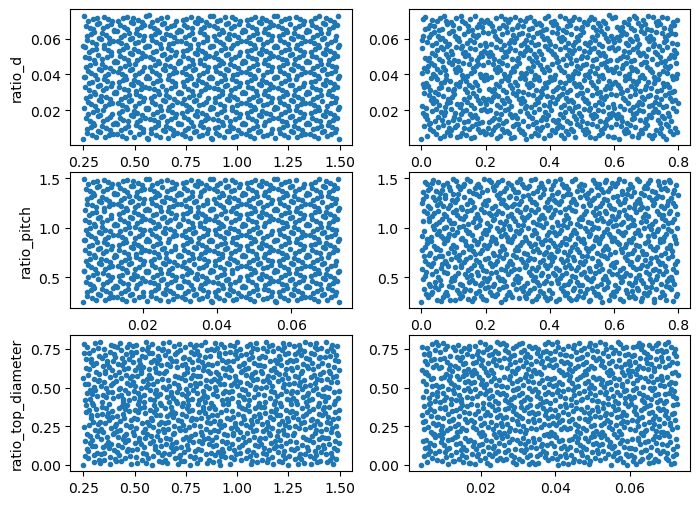

In [50]:
# 1.2. For the 3-d dataset plot all the points in 2-d scatter plots for all possible combinations of the input
# features, i.e. every pair of features as x and y of the scatter plots. Observe the sampling points and
# how they are distributed in the domain. Report your conclusions about the design of experiments
# strategy, but only show in the report the scatter plots for the first 100 points of the database (no
# need to plot every point in the database). Also include a 3-d scatter plot of the first 100 points (both
# plots should convey the same information). What can you conclude about the characteristics of the
# sampling method used (Sobol sequence)?
fig, axs = plt.subplots(3,2, figsize=[8,6])
sdf = input_3

# Plotting rows
axs[0,0].plot(sdf.ratio_pitch, sdf.ratio_d, ".")
axs[0,1].plot(sdf.ratio_top_diameter, sdf.ratio_d, ".")
axs[0,0].set_ylabel("ratio_d")

axs[1,0].plot(sdf.ratio_d, sdf.ratio_pitch, ".")
axs[1,1].plot(sdf.ratio_top_diameter, sdf.ratio_pitch, ".")
axs[1,0].set_ylabel("ratio_pitch")

axs[2,0].plot(sdf.ratio_pitch, sdf.ratio_top_diameter, ".")
axs[2,1].plot(sdf.ratio_d, sdf.ratio_top_diameter, ".")
axs[2,0].set_ylabel("ratio_top_diameter")

print("CONCLUSIONS:\nThe sampling method is not a completely random sampling, it has a random component but is gaurenteed to grab a characteristic sample of the entire domain.")

Text(0, 0.5, 'ratio_top_diameter')

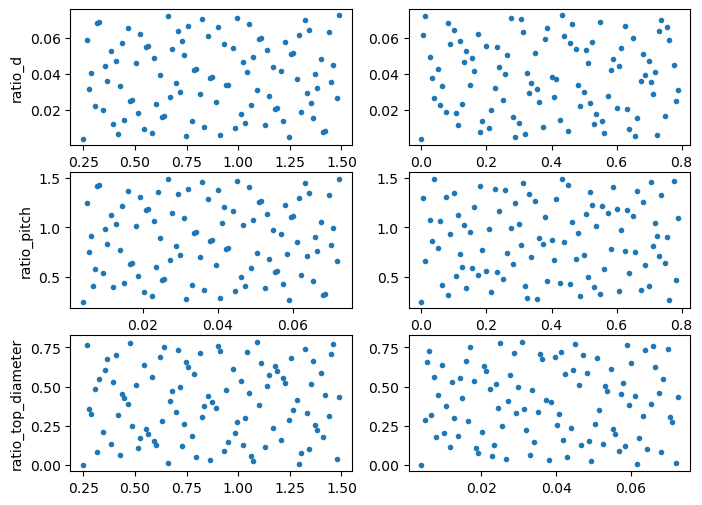

In [51]:
# 1.3 cont. Also include a 3-d scatter plot of the first 100 points (both
# plots should convey the same information). What can you conclude about the characteristics of the
# sampling method used (Sobol sequence)?
fig, axs = plt.subplots(3,2, figsize=[8,6])
sdf = input_3.iloc[:100]

# Plotting rows
axs[0,0].plot(sdf.ratio_pitch, sdf.ratio_d, ".")
axs[0,1].plot(sdf.ratio_top_diameter, sdf.ratio_d, ".")
axs[0,0].set_ylabel("ratio_d")

axs[1,0].plot(sdf.ratio_d, sdf.ratio_pitch, ".")
axs[1,1].plot(sdf.ratio_top_diameter, sdf.ratio_pitch, ".")
axs[1,0].set_ylabel("ratio_pitch")

axs[2,0].plot(sdf.ratio_pitch, sdf.ratio_top_diameter, ".")
axs[2,1].plot(sdf.ratio_d, sdf.ratio_top_diameter, ".")
axs[2,0].set_ylabel("ratio_top_diameter")

array([[<AxesSubplot: title={'center': 'sigma_crit'}>,
        <AxesSubplot: title={'center': 'energy'}>]], dtype=object)

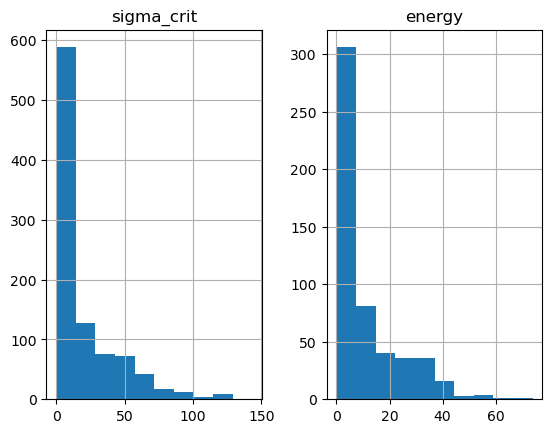

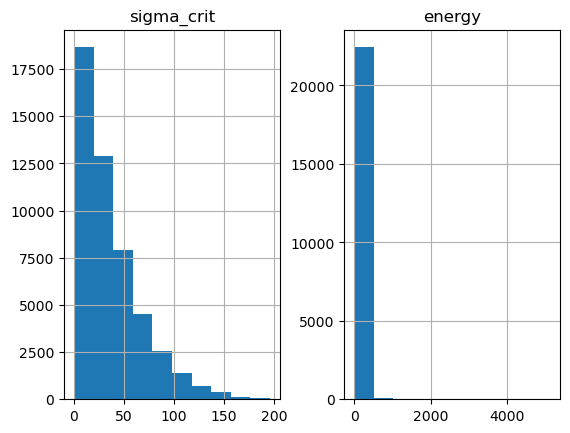

In [60]:
# 1.3. For both datasets, create histograms for each continuous output variable (number of points whose
# output is within particular intervals). 
output_3[["sigma_crit", "energy"]].hist()
output_7[["sigma_crit", "energy"]].hist() 

It looks like the energy data is very skewed, especially for the 7d input.
To remove the outliers we can try using the log of energy


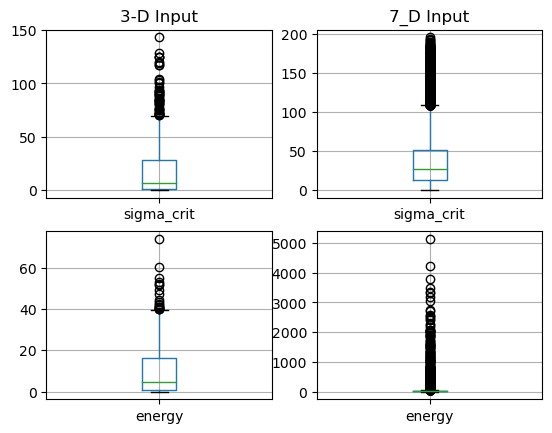

In [78]:
# 1.3 cont. If you find strong outliers, propose a strategy to remove those outliers 
fig, axs = plt.subplots(2, 2)

output_3[["sigma_crit"]].boxplot(ax=axs[0,0])
output_3[["energy"]].boxplot(ax=axs[1,0])

output_7[["sigma_crit"]].boxplot(ax=axs[0,1])
output_7[["energy"]].boxplot(ax=axs[1,1])

axs[0,0].set_title("3-D Input")
axs[0,1].set_title("7_D Input")

print("It looks like the energy data is very skewed, especially for the 7d input.")
print("To remove the outliers we can try using the log of energy")

<AxesSubplot: >

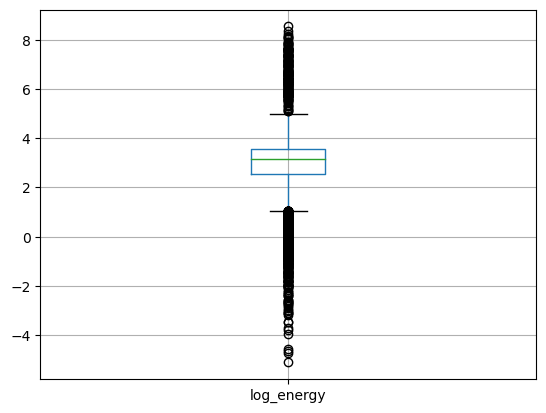

In [82]:
# 1.3. cont. and save a new database without these outliers. 
output_7["log_energy"] = np.log(output_7[["energy"]])
output_7[["log_energy"]].boxplot()

In [86]:
# 1.3. cont. Do a similar analysis for the categorical variables, but instead report the results in a table (number of points classified in each category).
output_3_vc = output_3["coilable"].value_counts()
print("Output 3 Counts")
print(output_3_vc)
print("\n")

output_7_vc = output_7["coilable"].value_counts()
print("Output 7 Counts")
print(output_7_vc)
print("\n")

print("Not really any outliers in this categorical data. Maybe we can run an experiment treating the 2 values replaced with 0 if it is mechanically useful.")

Output 3 Counts
2    468
0    318
1    214
Name: coilable, dtype: int64


Output 7 Counts
1    32331
0    17669
Name: coilable, dtype: int64


Not really any outliers in this categorical data. Maybe we can run an experiment treating the 2 values replaced with 0 if it is mechanically useful.


In [102]:
# 1.4. For the 3-d dataset, find the point corresponding to a material that is reversibly coilable (without
# yielding) that has maximum critical buckling stress, and another point that has maximum energy
# absorption capability (also for a reversibly coilable material). Report the feature values and every
# output value for both points.
print("Reversibly Coilable w/ maximum sigma critical:")
print(output_3[output_3.coilable == 1].sort_values(by="sigma_crit").iloc[-1])
print("\n")

print("Reversibly Coilable w/ maximum energy absorption capability:")
print(output_3[output_3.coilable == 1].sort_values(by="energy").dropna().iloc[-1])
print("\n")

Reversibly Coilable w/ maximum sigma critical:
coilable       1.000000
sigma_crit    93.408673
energy              NaN
Name: 981, dtype: float64


Reversibly Coilable w/ maximum energy absorption capability:
coilable      1.000000
sigma_crit    6.735183
energy        3.732142
Name: 420, dtype: float64


